Loading & Exploring The Dataset

In [18]:
# Importing 
import numpy as np
import pandas as pd

df  = pd.read_csv("epidemiology.csv")

# Preview 
print("Sample Data:")
print(df.head())

# Summary
print("Column Info:")
print(df.info())

# Check Missing Values 
print("Missing Values:")
print(df.isna().sum())

# Check Unique Lcation_Key
print("UNique LOcation:")
print(df["location_key"].value_counts()) 

Sample Data:
         date location_key  new_confirmed  new_deceased  new_recovered  \
0  2022-09-13           AD           34.0           0.0            NaN   
1  2022-09-13           AE          402.0           0.0            NaN   
2  2022-09-13           AF          259.0           0.0            NaN   
3  2022-09-15       AF_BAL            4.0           0.0           11.0   
4  2022-09-15       AF_BAM            5.0           0.0           25.0   

   new_tested  cumulative_confirmed  cumulative_deceased  \
0         NaN               46147.0                155.0   
1    325016.0             1021191.0               2342.0   
2         NaN              196663.0               7791.0   
3         NaN                8445.0                579.0   
4         NaN                4013.0                 52.0   

   cumulative_recovered  cumulative_tested  
0                   NaN           300307.0  
1                   NaN        168522672.0  
2                   NaN           994894.0  
3

Cleaning Dates, Numeric entries that don't make sense

In [19]:
# Convert, Cleaning 
# Date 
# 1. Convert Date to Be Date Not String Bec it Found As String In CSV 
df['date'] = pd.to_datetime(df['date'])

# Location_Key
# 1. Convert Loction to Be String, Title
df['location_key'] = df['location_key'].str.strip().str.title()

# Drop Only if Critical field are Mising Like (Date, Location_Key)

df = df.dropna(subset=["date", "location_key"])

# cumulative_confirmed, cumulative_deceased, cumulative_recovered, cumulative_tested
# 1. If No Value Replace it With Mean "Average"
cols = ['cumulative_confirmed', 'cumulative_deceased', 
        'cumulative_recovered', 'cumulative_tested']

for col in cols:
    # Replace NaN with column mean
    df[col].fillna(df[col].mean(), inplace=True)

# Forward-fill time Series Data

df = df.sort_values('date')

df['cumulative_confirmed_for_each_Location'] = df.groupby("location_key")['cumulative_confirmed'].ffill()

print(df.head())
print(df.info())

            date location_key  new_confirmed  new_deceased  new_recovered  \
17180 2020-07-09        Pt_30            0.0           0.0            0.0   
17179 2020-07-09        Pt_20            2.0           0.0            0.0   
17174 2020-07-09        Pt_11           57.0           0.0            0.0   
17178 2020-07-09        Pt_18           11.0           0.0            0.0   
17177 2020-07-09        Pt_17          328.0          13.0            0.0   

       new_tested  cumulative_confirmed  cumulative_deceased  \
17180         NaN                  95.0                  0.0   
17179         NaN                 151.0                 15.0   
17174         NaN               17957.0                821.0   
17178         NaN                 562.0                 18.0   
17177         NaN               21584.0                527.0   

       cumulative_recovered  cumulative_tested  \
17180                   0.0       2.406760e+06   
17179                   0.0       2.406760e+06   
17

/tmp/ipykernel_11875/3006985535.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Feature Engineering

In [20]:
# 1. Precentage Of Recovered, Tested, Deceased, Confirmed Per Day
df['precentage_of_recovered_per_day'] = (df['new_recovered']/ df['cumulative_recovered'])
df['precentage_of_tested_per_day'] = (df['new_tested']/ df['cumulative_tested'])
df['precentage_of_deceased_per_day'] = (df['new_deceased']/ df['cumulative_deceased'])
df['precentage_of_confirmed_per_day'] = (df['new_confirmed']/ df['cumulative_confirmed'])

# 2. deaths / confirmed
df['precentage_of_death_from_confirmed'] = (df['cumulative_deceased'] / df['cumulative_confirmed'])

# 3. Recovery Day
df['recovery-rate'] = (df['cumulative_recovered'] / df['cumulative_confirmed'].replace(0, pd.NA))

# 4. Case_To_Recovery_Ratio
df['case_to_recovery_ratio'] = (df['cumulative_confirmed']/df['cumulative_recovered'])

print(df)

            date location_key  new_confirmed  new_deceased  new_recovered  \
17180 2020-07-09        Pt_30            0.0           0.0            0.0   
17179 2020-07-09        Pt_20            2.0           0.0            0.0   
17174 2020-07-09        Pt_11           57.0           0.0            0.0   
17178 2020-07-09        Pt_18           11.0           0.0            0.0   
17177 2020-07-09        Pt_17          328.0          13.0            0.0   
...          ...          ...            ...           ...            ...   
691   2022-09-16           Au            0.0           0.0            0.0   
6962  2022-09-16        Cn_Sc            0.0           0.0            0.0   
6945  2022-09-16        Cn_Gd            0.0           0.0            0.0   
6968  2022-09-16        Cn_Xj            0.0           0.0            0.0   
17846 2022-12-30        Us_Dc       -31136.0           0.0            0.0   

       new_tested  cumulative_confirmed  cumulative_deceased  \
17180      

In [21]:
# Export cleaned file
df.to_csv("cleaned_covid_19.csv", index=False)

# Final summary
print("\n✅ Final Dataset Snapshot:")
print(df.head())




✅ Final Dataset Snapshot:
            date location_key  new_confirmed  new_deceased  new_recovered  \
17180 2020-07-09        Pt_30            0.0           0.0            0.0   
17179 2020-07-09        Pt_20            2.0           0.0            0.0   
17174 2020-07-09        Pt_11           57.0           0.0            0.0   
17178 2020-07-09        Pt_18           11.0           0.0            0.0   
17177 2020-07-09        Pt_17          328.0          13.0            0.0   

       new_tested  cumulative_confirmed  cumulative_deceased  \
17180         NaN                  95.0                  0.0   
17179         NaN                 151.0                 15.0   
17174         NaN               17957.0                821.0   
17178         NaN                 562.0                 18.0   
17177         NaN               21584.0                527.0   

       cumulative_recovered  cumulative_tested  \
17180                   0.0       2.406760e+06   
17179                   0

In [22]:
# Importing
import matplotlib.pyplot as plt

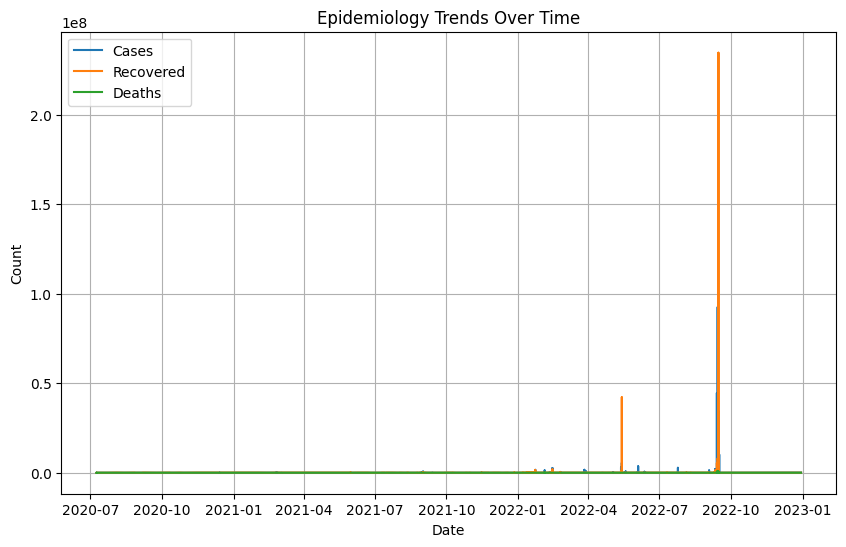

In [23]:
# Line chart of cases vs recoveries
plt.figure(figsize=(10,6))

plt.plot(df['date'], df['cumulative_confirmed'].dropna(), label='Cases')
plt.plot(df['date'], df['cumulative_recovered'].dropna(), label='Recovered')
plt.plot(df['date'], df['cumulative_deceased'].dropna(), label='Deaths')

plt.legend()
plt.title("Epidemiology Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.show()



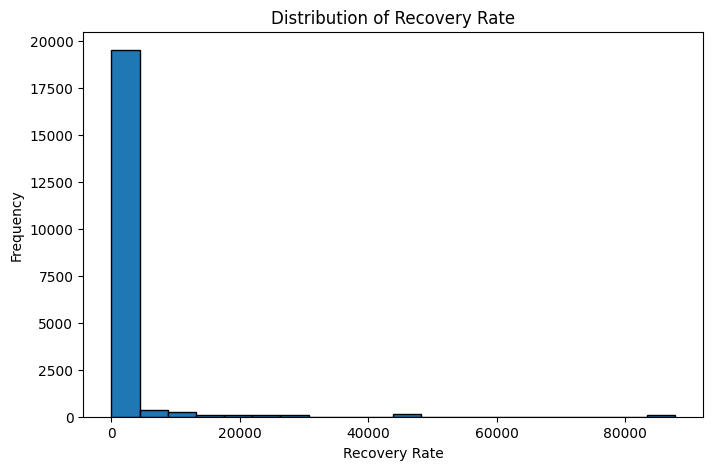

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df['recovery-rate'].dropna(), bins=20, edgecolor='black')
plt.title("Distribution of Recovery Rate")
plt.xlabel("Recovery Rate")
plt.ylabel("Frequency")
plt.show()


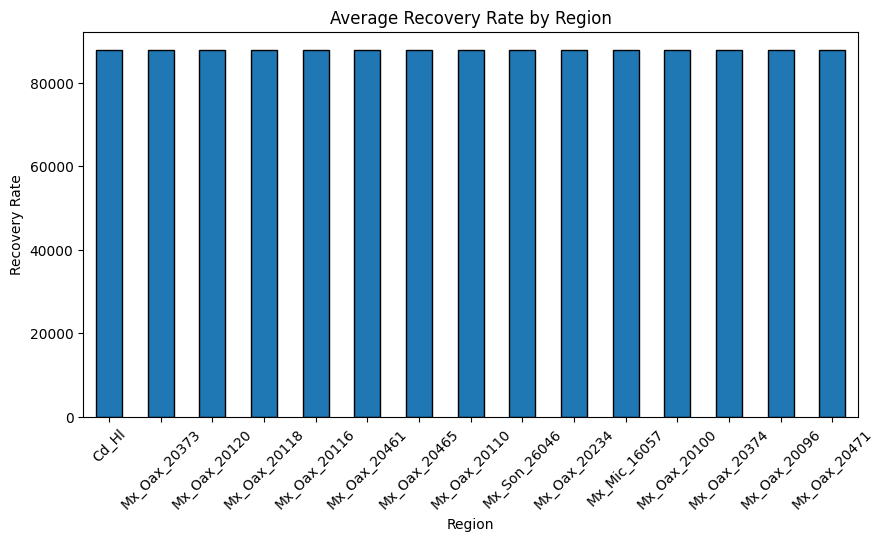

In [25]:
recovery_by_region = (
    df.groupby('location_key')['recovery-rate']
      .mean()
      .dropna()
      .sort_values(ascending=False)
)
plt.figure(figsize=(10,5))
recovery_by_region.head(15).plot(kind='bar', edgecolor='black')
plt.title("Average Recovery Rate by Region")
plt.xlabel("Region")
plt.ylabel("Recovery Rate")
plt.xticks(rotation=45)
plt.show()


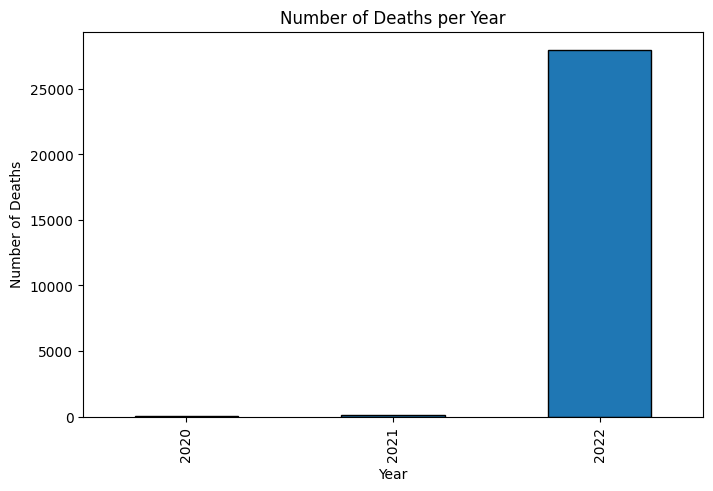

In [26]:

# Ensure date is datetime
df['date'] = pd.to_datetime(df['date'])

# Extract year
df['year'] = df['date'].dt.year

# Aggregate deaths per year
deaths_per_year = (
    df.groupby('year')['new_deceased']
      .sum()
      .dropna()
)

# Plot
plt.figure(figsize=(8,5))
deaths_per_year.plot(kind='bar', edgecolor='black')
plt.title("Number of Deaths per Year")
plt.xlabel("Year")
plt.ylabel("Number of Deaths")
plt.show()




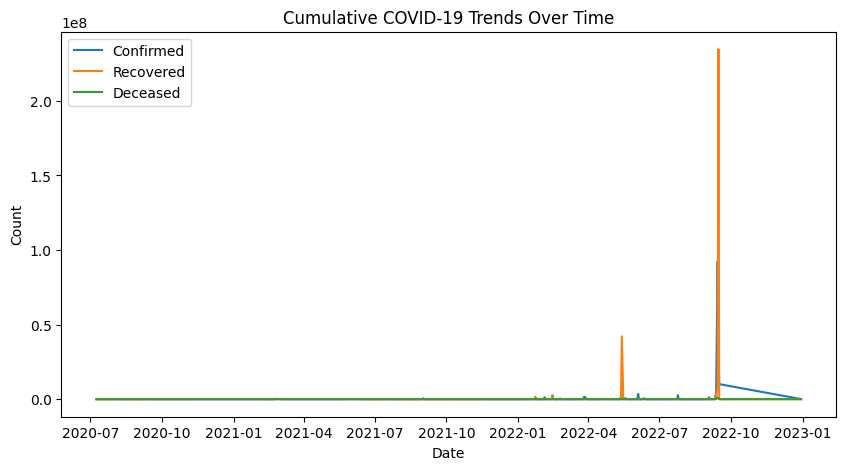

In [27]:
cumulative = df.groupby('date')[
    ['cumulative_confirmed', 'cumulative_recovered', 'cumulative_deceased']
].max()

plt.figure(figsize=(10,5))
plt.plot(cumulative.index, cumulative['cumulative_confirmed'], label='Confirmed')
plt.plot(cumulative.index, cumulative['cumulative_recovered'], label='Recovered')
plt.plot(cumulative.index, cumulative['cumulative_deceased'], label='Deceased')
plt.legend()
plt.title("Cumulative COVID-19 Trends Over Time")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()


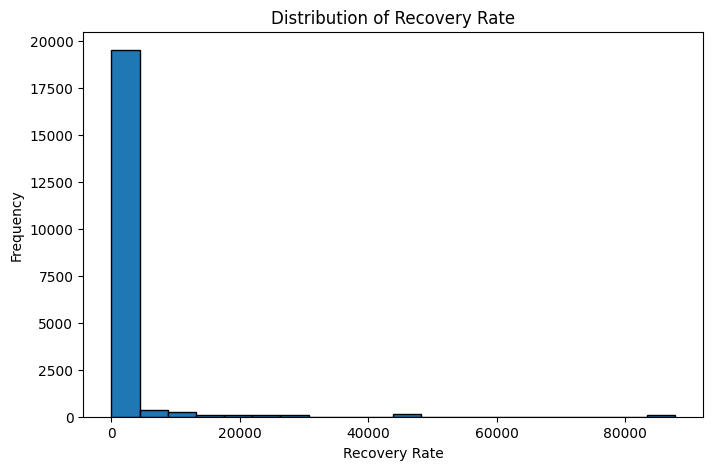

In [28]:
plt.figure(figsize=(8,5))
plt.hist(df['recovery-rate'].dropna(), bins=20, edgecolor='black')
plt.title("Distribution of Recovery Rate")
plt.xlabel("Recovery Rate")
plt.ylabel("Frequency")
plt.show()


<Figure size 800x500 with 0 Axes>

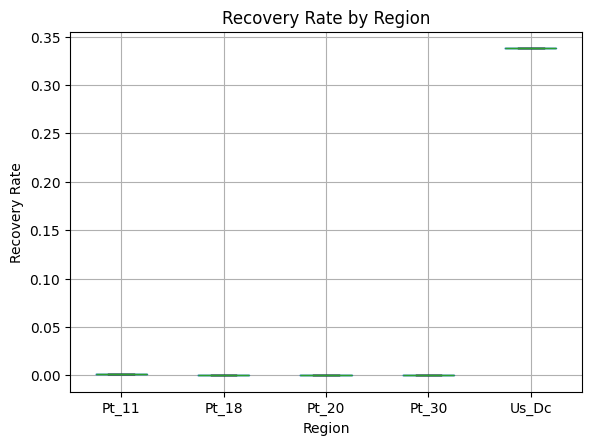

In [29]:
top_regions = df['location_key'].value_counts().head(5).index
filtered = df[df['location_key'].isin(top_regions)]

plt.figure(figsize=(8,5))
filtered.boxplot(column='recovery-rate', by='location_key')
plt.title("Recovery Rate by Region")
plt.suptitle("")
plt.xlabel("Region")
plt.ylabel("Recovery Rate")
plt.show()


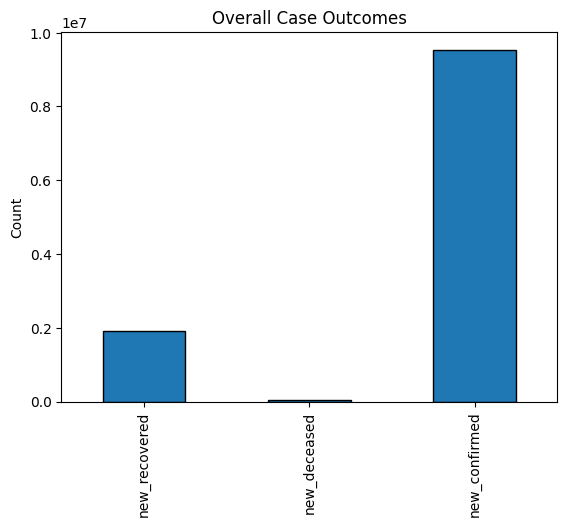

In [30]:
outcomes = df[['new_recovered', 'new_deceased', 'new_confirmed']].sum()

outcomes.plot(kind='bar', stacked=True, edgecolor='black')
plt.title("Overall Case Outcomes")
plt.ylabel("Count")
plt.show()


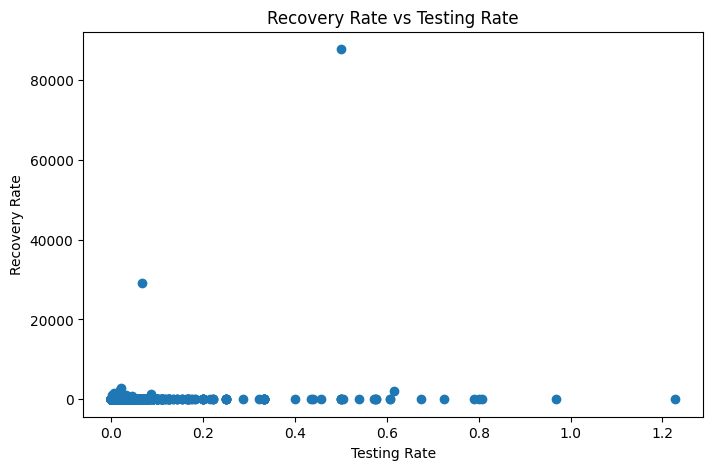

In [31]:
scatter_df = df[
    ['precentage_of_tested_per_day', 'recovery-rate']
].dropna()

plt.figure(figsize=(8,5))
plt.scatter(
    scatter_df['precentage_of_tested_per_day'],
    scatter_df['recovery-rate']
)
plt.title("Recovery Rate vs Testing Rate")
plt.xlabel("Testing Rate")
plt.ylabel("Recovery Rate")
plt.show()


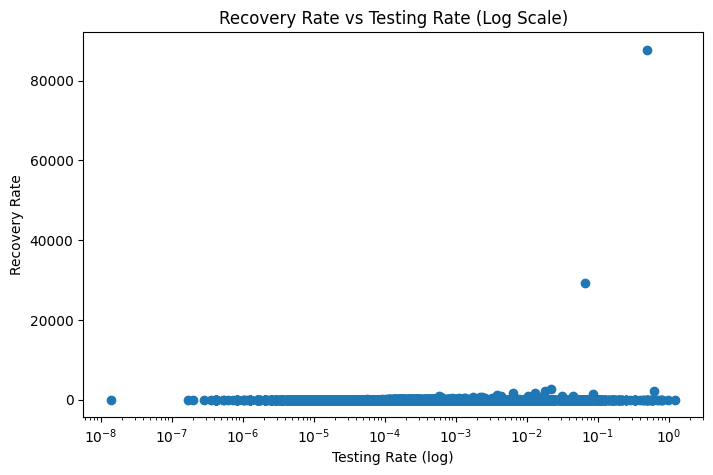

In [32]:
plt.figure(figsize=(8,5))
plt.scatter(
    scatter_df['precentage_of_tested_per_day'],
    scatter_df['recovery-rate']
)
plt.xscale('log')
plt.title("Recovery Rate vs Testing Rate (Log Scale)")
plt.xlabel("Testing Rate (log)")
plt.ylabel("Recovery Rate")
plt.show()


In [35]:
df["cumulative_confirmed"] = df["cumulative_confirmed"].astype("int64")


In [36]:
import pandera as pa

schema = pa.DataFrameSchema({
    "date": pa.Column(pa.DateTime),
    "location_key": pa.Column(pa.String, nullable=False),
    "cumulative_confirmed": pa.Column(pa.Int, checks=pa.Check.ge(0)),
})

schema.validate(df)


,date,location_key,new_confirmed,new_deceased,new_recovered,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_recovered,cumulative_tested,cumulative_confirmed_for_each_Location,precentage_of_recovered_per_day,precentage_of_tested_per_day,precentage_of_deceased_per_day,precentage_of_confirmed_per_day,precentage_of_death_from_confirmed,recovery-rate,case_to_recovery_ratio,year
17180,2020-07-09,Pt_30,0.0,0.0,0.0,NaN,95,0.0,0.0,2.406760e+06,95.0,NaN,NaN,NaN,0.000000,0.000000,0.0,inf,2020
17179,2020-07-09,Pt_20,2.0,0.0,0.0,NaN,151,15.0,0.0,2.406760e+06,151.0,NaN,NaN,0.000000,0.013245,0.099338,0.0,inf,2020
17174,2020-07-09,Pt_11,57.0,0.0,0.0,NaN,17957,821.0,16.0,2.406760e+06,17957.0,0.0,NaN,0.000000,0.003174,0.045720,0.000891,1122.312500,2020
17178,2020-07-09,Pt_18,11.0,0.0,0.0,NaN,562,18.0,0.0,2.406760e+06,562.0,NaN,NaN,0.000000,0.019573,0.032028,0.0,inf,2020
17177,2020-07-09,Pt_17,328.0,13.0,0.0,NaN,21584,527.0,17.0,2.406760e+06,21584.0,0.0,NaN,0.024668,0.015196,0.024416,0.000788,1269.647059,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
691,2022-09-16,Au,0.0,0.0,0.0,0.0,10124671,14475.0,0.0,7.863916e+07,10124671.0,NaN,0.00000,0.000000,0.000000,0.001430,0.0,inf,2022
6962,2022-09-16,Cn_Sc,0.0,0.0,0.0,NaN,5072,3.0,3523.0,2.406760e+06,5072.0,0.0,NaN,0.000000,0.000000,0.000591,0.694598,1.439682,2022
6945,2022-09-16,Cn_Gd,0.0,0.0,0.0,NaN,9729,8.0,9140.0,2.406760e+06,9729.0,0.0,NaN,0.000000,0.000000,0.000822,0.939459,1.064442,2022
6968,2022-09-16,Cn_Xj,0.0,0.0,0.0,NaN,1161,3.0,1144.0,2.406760e+06,1161.0,0.0,NaN,0.000000,0.000000,0.002584,0.985357,1.014860,2022
